In [1]:
# Importing Dependencies

import pandas as pd

In [2]:
# Scraping the data using pandas and assembling it into Pandas DataFrame.

mars_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')[0]
mars_df.columns=['id','terrestrial_date','sol','ls','month','min_temp','pressure']

mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
# Checking the data types of df.
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [4]:
# Converting the data type of the column 'terrestrial_date' to datetime.
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [5]:
# Checking the data types.
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [6]:
# Examine the number of months on mars.
mars_df['month'].value_counts().sort_index()


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [7]:
# Number of months on Mars = 12.
mars_df['month'].max()

12

In [34]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset? = 1867
mars_days = mars_df.sol.count()
mars_days

1867

In [9]:
# The minimum temperatre on Mars monthwise.
min_temp = mars_df.groupby('month')['min_temp'].min()


min_temp

month
1    -82.0
2    -86.0
3    -90.0
4    -89.0
5    -85.0
6    -84.0
7    -78.0
8    -75.0
9    -78.0
10   -81.0
11   -78.0
12   -81.0
Name: min_temp, dtype: float64

In [10]:
# The maximum temperatre on Mars monthwise.
max_temp = mars_df.groupby('month')['min_temp'].max()


max_temp

month
1    -62.0
2    -76.0
3    -77.0
4    -77.0
5    -74.0
6    -71.0
7    -65.0
8    -63.0
9    -63.0
10   -66.0
11   -67.0
12   -70.0
Name: min_temp, dtype: float64

In [11]:
# Plotting the results to find out average minimum daily temperature
temp = {"Coldest Months":min_temp,
        "Warmest Months":max_temp
}
temp_df = pd.DataFrame(temp)
temp_df.to_csv('The coldest and the warmest months on Mars')


In [12]:
temp_df

,Coldest Months,Warmest Months
month,,
1,-82.0,-62.0
2,-86.0,-76.0
3,-90.0,-77.0
4,-89.0,-77.0
5,-85.0,-74.0
6,-84.0,-71.0
7,-78.0,-65.0
8,-75.0,-63.0
9,-78.0,-63.0


In [13]:
# Average low temperature by month
average_temp= temp_df.mean(axis=1)
average_temp

month
1    -72.0
2    -81.0
3    -83.5
4    -83.0
5    -79.5
6    -77.5
7    -71.5
8    -69.0
9    -70.5
10   -73.5
11   -72.5
12   -75.5
dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

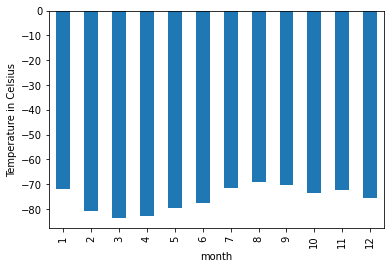

In [23]:
# Plotting the bar chart
ax = average_temp.plot.bar()
ax.set_ylabel('Temperature in Celsius')

In [15]:
# Examine the atmospheric pressure on Mars monthwise.
# The minimum atmospheric pressure on Mars
min_pres = mars_df.groupby('month')['pressure'].min()
min_pres


month
1     820.0
2     867.0
3     833.0
4     754.0
5     727.0
6     732.0
7     751.0
8     828.0
9     896.0
10    862.0
11    837.0
12    829.0
Name: pressure, dtype: float64

In [16]:
# The maximum atmospheric pressure on Mars
max_pres = mars_df.groupby('month')['pressure'].max()
max_pres

month
1     888.0
2     908.0
3     907.0
4     857.0
5     777.0
6     764.0
7     836.0
8     914.0
9     925.0
10    917.0
11    879.0
12    853.0
Name: pressure, dtype: float64

In [17]:
# Plotting the results to check months with the lowest and the highest atmospheric pressure on Mars
pressure = {'Lowest pressure': min_pres,
           'Highest pressure': max_pres}
pressure_df = pd.DataFrame(pressure)
pressure_df.to_csv('Lowest and the highest atmospheric pressure on Mars')



In [18]:
# Finding the average pressure
avg_pres = pressure_df.mean(axis=1)
avg_pres

month
1     854.0
2     887.5
3     870.0
4     805.5
5     752.0
6     748.0
7     793.5
8     871.0
9     910.5
10    889.5
11    858.0
12    841.0
dtype: float64

Text(0, 0.5, 'Atmospheric Pressure')

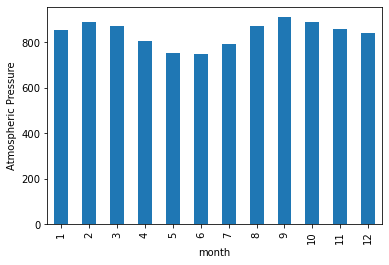

In [22]:
# Plotting the bar chart
ax = avg_pres.plot.bar()
ax.set_ylabel('Atmospheric Pressure')

In [39]:
days = mars_df.groupby('month')['min_temp'].mean()
days

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month'>

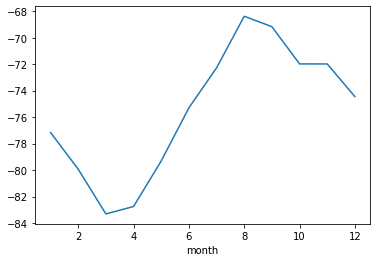

In [40]:
days.plot.line()